# **Assignment 2: Mastering Big Data Handling**



**Course:** HPDP SECP3133-01

**THEVAN RAJU A/L JEGANATH**
**A22EC0286**


**NAVACHANDER NAVASANTAR**
**A22EC0226**

## **Task 1: Dataset Selection**

For this assignment, the **Spotify Charts** dataset was selected from Kaggle. This dataset provides comprehensive information on daily "Top 200" and "Viral 50" charts published globally by Spotify since January 1, 2017.

* **Dataset Name:** Spotify Charts
* **Source:** Kaggle - [https://www.kaggle.com/datasets/dhruvildave/spotify-charts](https://www.kaggle.com/datasets/dhruvildave/spotify-charts)
* **Dataset Size:** 3.48 GB (downloaded size from Kaggle)
* **Domain:** Music Streaming, Entertainment, Chart Data, Time Series Analysis
* **Number of Records (Initial Observation):** Over 26 million records, as observed after initial loading.
* **Why selected:** The Spotify Charts dataset was chosen for this assignment due to its significant size, featuring over 26 million records and a downloaded size of 3.48 GB, making it an ideal candidate for demonstrating big data handling strategies within the context of the HPDP SECP3133-01 course. This comprehensive dataset, sourced from Kaggle, provides daily "Top 200" and "Viral 50" charts globally since January 1, 2017, placing it within the relevant domain of Music Streaming, Entertainment, Chart Data, and Time Series Analysis.

## **Task 2: Load and Inspect Data**

This task establishes a baseline for comparing different big data handling strategies. The primary objective was to download the Spotify Charts dataset and then perform an initial full load into a Pandas DataFrame using the standard pd.read_csv() method. This approach serves as the "traditional method" and helps to identify the default memory and time consumption without any optimizations. Initial inspection involves checking the DataFrame's shape, column names, and inferred data types to understand its structure and content.

### **1. Install and configure Kaggle API**




In [ ]:
pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

### **2. Download and Unzip**

In [ ]:
!pip install -q kaggle
!kaggle datasets download -d dhruvildave/spotify-charts

Dataset URL: https://www.kaggle.com/datasets/dhruvildave/spotify-charts
License(s): ODbL-1.0
 95% 902M/945M [00:07<00:00, 171MB/s]
100% 945M/945M [00:07<00:00, 133MB/s]


In [ ]:
!unzip -q spotify-charts.zip -d spotify_data

### **3. Load into Pandas DataFrame**

This loads the entire dataset into memory at once with default settings. It is simple but can be slow and memory-heavy for large files.

In [ ]:
import pandas as pd
import time
import gc

# Step 1: Start timer
start_time = time.time()

# Step 2: Load the full dataset
df = pd.read_csv('spotify_data/charts.csv')

# Step 3: End timer
end_time = time.time()

# Step 4: Memory usage
memory_MB = df.memory_usage(deep=True).sum() / (1024 ** 2)

# Step 5: Print result
print("=== Traditional Full Load Metrics ===")
print(f"🔹 Load Time        : {end_time - start_time:.2f} seconds")
print(f"🔹 Memory Usage     : {memory_MB:.2f} MB")

=== Traditional Full Load Metrics ===
🔹 Load Time        : 81.13 seconds
🔹 Memory Usage     : 13431.49 MB


### **4. Initial Inspection**

In [ ]:
# Get number of rows and columns
print("Shape:", df.shape)

# Get column names
print("Columns:", df.columns.tolist())

# Get data types and non-null info
df.info()

del df
gc.collect()

Shape: (26173514, 9)
Columns: ['title', 'rank', 'date', 'artist', 'url', 'region', 'chart', 'trend', 'streams']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26173514 entries, 0 to 26173513
Data columns (total 9 columns):
 #   Column   Dtype  
---  ------   -----  
 0   title    object 
 1   rank     int64  
 2   date     object 
 3   artist   object 
 4   url      object 
 5   region   object 
 6   chart    object 
 7   trend    object 
 8   streams  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.8+ GB


0

## **Task 3: Apply Big Data Handling Strategies & Libraries**

### **Strategy 1: Load Less Data**

Loads only specific important columns to reduce memory usage and speed up loading. This step is ideal when we don’t need all columns.

In [ ]:
import pandas as pd
import time
import gc

# Define only the necessary columns to load from the CSV
use_cols = ['title', 'rank', 'date', 'artist', 'region']

# Start the timer to measure loading duration
start_time = time.time()

# Load only selected columns from the CSV to reduce memory usage
df_less = pd.read_csv('spotify_data/charts.csv', usecols=use_cols)

# Stop the timer after loading
end_time = time.time()

# Calculate memory usage of the DataFrame in megabytes (MB)
memory_MB = df_less.memory_usage(deep=True).sum() / (1024 ** 2)

# Print metrics for comparison
print("=== Load Less Data Metrics ===")
print(f"🔹 Load Time        : {end_time - start_time:.2f} seconds")
print(f"🔹 Memory Usage     : {memory_MB:.2f} MB")
print(f"🔹 DataFrame Shape  : {df_less.shape}")
print(f"🔹 Column Names     : {df_less.columns.tolist()}")
print(f"🔹 Data Types       :\n{df_less.dtypes}")

# Delete DataFrame to free memory
del df_less

# Manually run garbage collector to clear up memory
gc.collect()

=== Load Less Data Metrics ===
🔹 Load Time        : 69.64 seconds
🔹 Memory Usage     : 7266.65 MB
🔹 DataFrame Shape  : (26173514, 5)
🔹 Column Names     : ['title', 'rank', 'date', 'artist', 'region']
🔹 Data Types       :
title     object
rank       int64
date      object
artist    object
region    object
dtype: object


0

### **Strategy 2: Use Chunking**

In [ ]:
import pandas as pd
import time
import gc

chunk_size = 500000
chunks = []
total_processed_rows = 0
chunk_count = 0

# Start timing
start_time = time.time()

# Read chunks only (timer measures this part only)
for i, chunk in enumerate(pd.read_csv('spotify_data/charts.csv', chunksize=chunk_size)):
    chunk_count += 1
    total_processed_rows += len(chunk)
    chunks.append(chunk)
    print(f"✅ Chunk {i+1}: {len(chunk)} rows. Total rows: {total_processed_rows}")

# End timing after load
end_time = time.time()

# Now concatenate and calculate memory after end_time (like your other strategies)
df_full = pd.concat(chunks, ignore_index=True)
memory_MB = df_full.memory_usage(deep=True).sum() / 1024 ** 2

# Print results
print("\n=== Chunking Load Metrics ===")
print(f"🔹 Chunks Processed       : {chunk_count}")
print(f"🔹 Total Rows Processed   : {total_processed_rows}")
print(f"🔹 Load Time              : {end_time - start_time:.2f} seconds")
print(f"🔹 Memory Usage           : {memory_MB:.2f} MB")

# Cleanup
del df_full, chunks, chunk
gc.collect()

✅ Chunk 1: 500000 rows. Total rows: 500000
✅ Chunk 2: 500000 rows. Total rows: 1000000
✅ Chunk 3: 500000 rows. Total rows: 1500000
✅ Chunk 4: 500000 rows. Total rows: 2000000
✅ Chunk 5: 500000 rows. Total rows: 2500000
✅ Chunk 6: 500000 rows. Total rows: 3000000
✅ Chunk 7: 500000 rows. Total rows: 3500000
✅ Chunk 8: 500000 rows. Total rows: 4000000
✅ Chunk 9: 500000 rows. Total rows: 4500000
✅ Chunk 10: 500000 rows. Total rows: 5000000
✅ Chunk 11: 500000 rows. Total rows: 5500000
✅ Chunk 12: 500000 rows. Total rows: 6000000
✅ Chunk 13: 500000 rows. Total rows: 6500000
✅ Chunk 14: 500000 rows. Total rows: 7000000
✅ Chunk 15: 500000 rows. Total rows: 7500000
✅ Chunk 16: 500000 rows. Total rows: 8000000
✅ Chunk 17: 500000 rows. Total rows: 8500000
✅ Chunk 18: 500000 rows. Total rows: 9000000
✅ Chunk 19: 500000 rows. Total rows: 9500000
✅ Chunk 20: 500000 rows. Total rows: 10000000
✅ Chunk 21: 500000 rows. Total rows: 10500000
✅ Chunk 22: 500000 rows. Total rows: 11000000
✅ Chunk 23: 50000

0

### **Strategy 3: Optimize Data Types**

This strategy focuses on memory optimization by explicitly defining more efficient data types for columns during the pd.read_csv() operation using the dtype and parse_dates parameters. By converting columns like rank to int16, streams to float32, date to datetime, and string columns like region and chart to category (where unique values are limited), less memory is required to store the data, as smaller data types are used and categorical data is stored efficiently as integers with a lookup table.

In [ ]:
import pandas as pd
import time
import gc

# Define dtypes to optimize memory usage
dtypes = {
    'rank': 'int16',
    'chart': 'category',
    'region': 'category',
    'streams': 'float32'
}

# Start timer
start_time = time.time()

# Load data with optimized types
df_opt = pd.read_csv(
    'spotify_data/charts.csv',
    dtype=dtypes,
    parse_dates=['date']
)

end_time = time.time()

# Calculate memory usage
memory_MB = df_opt.memory_usage(deep=True).sum() / (1024 ** 2)

# Print metrics
print("=== Optimized During Load Metrics ===")
print(f"🔹 Load Time           : {end_time - start_time:.2f} seconds")
print(f"🔹 Memory Usage        : {memory_MB:.2f} MB")
print(f"🔹 DataFrame Shape     : {df_opt.shape}")
print(f"🔹 Column Data Types:\n{df_opt.dtypes}")

# Cleanup
del df_opt
gc.collect()

=== Optimized During Load Metrics ===
🔹 Load Time           : 191.54 seconds
🔹 Memory Usage        : 8557.44 MB
🔹 DataFrame Shape     : (26173514, 9)
🔹 Column Data Types:
title              object
rank                int16
date       datetime64[ns]
artist             object
url                object
region           category
chart            category
trend              object
streams           float32
dtype: object


0

### **Strategy 4: Sampling**

Loads the full dataset but keeps only a random sample. It is useful for testing or exploring data patterns without using the full dataset.

In [ ]:
import random
import pandas as pd
import time
import gc

# Start timer
start_time = time.time()

# Sample 5% of rows randomly
df_sample = pd.read_csv('spotify_data/charts.csv', skiprows=lambda i: i > 0 and random.random() > 0.05)
end_time = time.time()

# Calculate memory usage
memory_MB = df_sample.memory_usage(deep=True).sum() / (1024 ** 2)

print("=== Sampling Metrics ===")
print(f"🔹 Load Time        : {end_time - start_time:.2f} seconds")
print(f"🔹 Memory Usage     : {memory_MB:.2f} MB")
print(f"🔹 DataFrame Shape  : {df_sample.shape}")

# Cleanup
del df_sample
gc.collect()

=== Sampling Metrics ===
🔹 Load Time        : 36.32 seconds
🔹 Memory Usage     : 672.75 MB
🔹 DataFrame Shape  : (1311034, 9)


0

### **Library 1: Dask**

In [ ]:
!pip install -q dask polars


In [ ]:
!pip install dask --quiet

import dask.dataframe as dd
import time
import gc

# Clear memory
gc.collect()

# Step 1: Start timer
start_time = time.time()

# Step 2: Load the dataset (fixing dtype warning)
dask_df = dd.read_csv('spotify_data/charts.csv', dtype={'streams': 'float64'})
dask_df = dask_df.compute()

# Step 3: End timer
end_time = time.time()

# Step 4: Calculate metrics
dask_time = end_time - start_time
dask_mem = dask_df.memory_usage(deep=True).sum() / (1024 ** 2)

# Step 5: Shape
dask_shape = dask_df.shape

# Step 5: Print result
print("=== Dask Metrics ===")
print(f"🔹 Load Time    : {dask_time:.2f} seconds")
print(f"🔹 Memory Usage : {dask_mem:.2f} MB")
print(f"🔹 Shape        : {dask_shape}")

=== Dask Metrics ===
🔹 Load Time    : 97.38 seconds
🔹 Memory Usage : 4932.25 MB
🔹 Shape        : (26173514, 9)


### **Library 2: Polar**

In [ ]:
import polars as pl
import time

# Step 1: Start timer
start_time = time.time()

# Step 2: Load dataset
polars_df = pl.read_csv('spotify_data/charts.csv')

# Step 3: End timer
end_time = time.time()
polars_time = end_time - start_time

# Step 4: Memory usage
polars_mem = polars_df.estimated_size("mb")

# Step 5: Shape
polars_shape = (polars_df.height, polars_df.width)

# Step 6: Print result
print("=== Polars ===")
print(f"🔹 Load Time        : {polars_time:.2f} seconds")
print(f"🔹 Memory Usage     : {polars_mem:.2f} MB")
print(f"🔹 Shape            : {polars_shape}")


=== Polars ===
🔹 Load Time        : 22.47 seconds
🔹 Memory Usage     : 3335.75 MB
🔹 Shape            : (26173514, 9)


## **Task 4: Comparative Analysis**

### **Compare Strategies**

**Evaluation Chart**

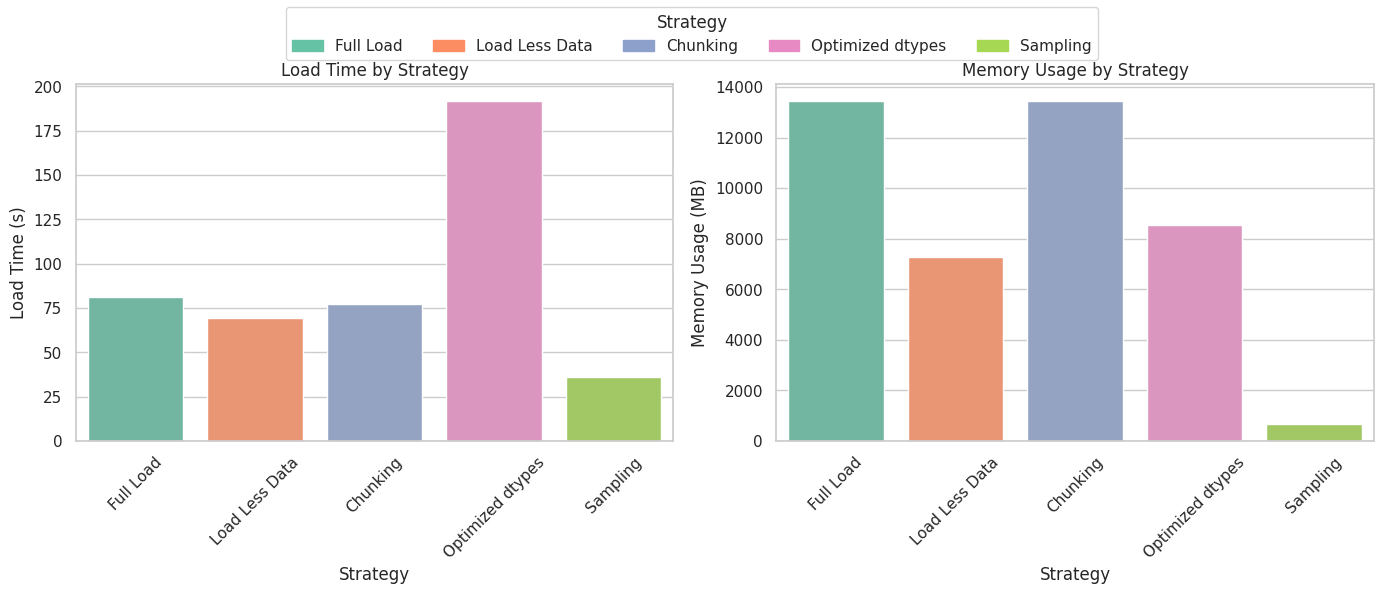

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Strategy metrics
data = {
    'Strategy': [
        'Full Load',
        'Load Less Data',
        'Chunking',
        'Optimized dtypes',
        'Sampling',
    ],
    'Load Time (s)': [
        81.13,
        69.64,
        77.43,
        191.54,
        36.32,
    ],
    'Memory Usage (MB)': [
        13431.49,
        7266.65,
        13431.49,
        8557.44,
        672.75,
    ]
}

df = pd.DataFrame(data)

sns.set(style="whitegrid")
palette = sns.color_palette("Set2", len(df))

# Create plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Chart 1: Load Time
sns.barplot(x='Strategy', y='Load Time (s)', data=df, ax=axes[0], hue='Strategy', palette=palette, legend=False)
axes[0].set_title("Load Time by Strategy")
axes[0].set_ylabel("Load Time (s)")
axes[0].tick_params(axis='x', rotation=45)

# Chart 2: Memory Usage
sns.barplot(x='Strategy', y='Memory Usage (MB)', data=df, ax=axes[1], hue='Strategy', palette=palette, legend=False)
axes[1].set_title("Memory Usage by Strategy")
axes[1].set_ylabel("Memory Usage (MB)")
axes[1].tick_params(axis='x', rotation=45)

# Add shared legend
handles = [plt.Rectangle((0, 0), 1, 1, color=palette[i]) for i in range(len(df))]
labels = df['Strategy'].tolist()
fig.legend(handles, labels, loc='upper center', ncol=len(df), title="Strategy")

# Save the figure
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.savefig("strategy_comparison.png", dpi=300)  # ← Saves the image
plt.show()

**"Load Time by Strategy" Graph**

---

*   The Full Load took 81.13 seconds, which is highest as no strategy was applied.
*   Sampling is the fastest, completing its task in 36.32 seconds.
*   Load Less Data (69.64 seconds) and Chunking (77.43 seconds) are notably efficient.
*   Optimized dtypes is the slowest at 191.54 seconds due to the overhead of type conversions during loading.

**"Memory Usage by Strategy" Graph**

---


*  Sampling uses the least memory at 672.75 MB, making it highly efficient.
*  Load Less Data (7266.65 MB) and Optimized dtypes (8557.44 MB) show significant memory reductions compared to the full load.
*  The Full Load and Chunking both show 13431.49 MB.
*  For Chunking, while it processes data around 256 MB per chunk, this high final memory usage indicates that all processed chunks were combined into a single DataFrame for the final measurement, resulting in memory usage equivalent to the full dataset. The graph's lower bar for Chunking might represent its low peak memory usage during the iterative process.

### ⚙️ Ease of Processing

Beyond speed and memory, each strategy differs in how easy it is to implement and work with:

- **Full Load:** Easiest to write (`pd.read_csv()`), but impractical for large files. Risk of crashes and slowdowns if RAM is exceeded.

- **Load Less Data:** Simple to implement using `usecols` or `nrows`. Reduces memory and speeds up analysis, as long as partial data is sufficient.

- **Chunking:** More complex due to looping and combining results. However, it handles large files well without memory issues.

- **Optimized dtypes:** Requires some prep (knowing column types) but greatly improves efficiency once set. Slightly harder to implement.

- **Sampling:** Very easy using `skiprows` or `sample(frac=...)`. Great for testing or exploration, but may miss important data patterns.


### **Compare Libraries**

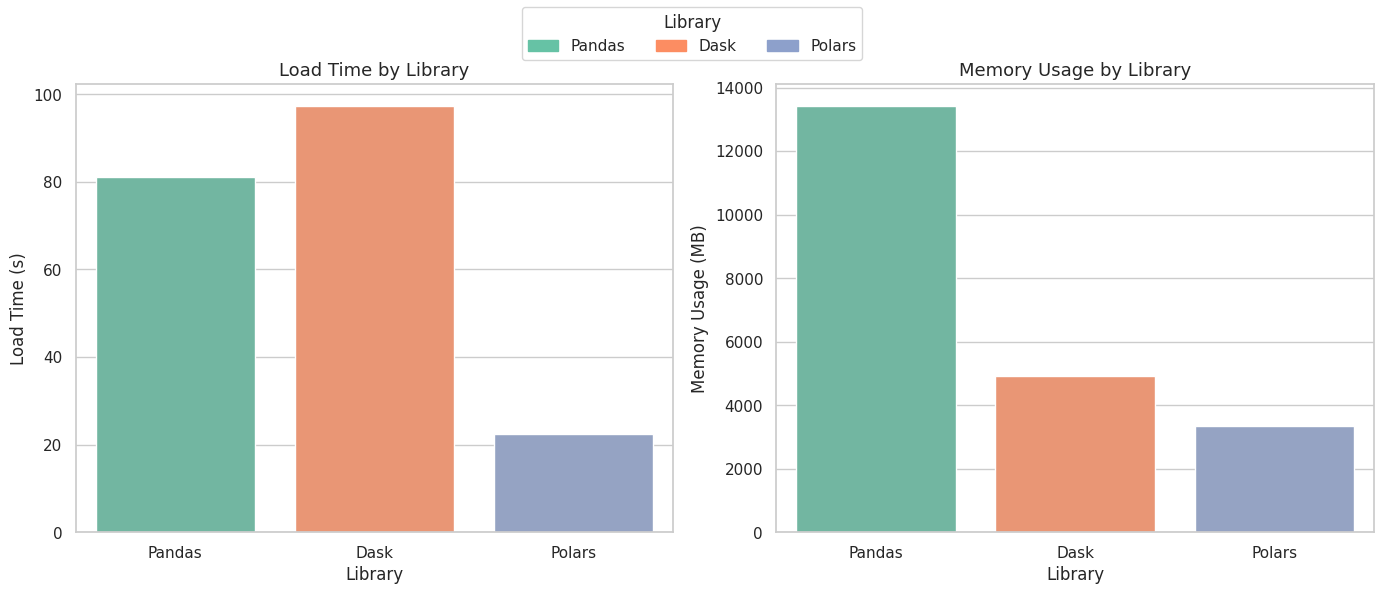

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data for Pandas, Dask, and Polars
data = {
    'Library': ['Pandas', 'Dask', 'Polars'],
    'Load Time (s)': [81.13, 97.38, 22.47],
    'Memory Usage (MB)': [13431.49, 4932.25, 3335.75]
}

df = pd.DataFrame(data)

# Set Seaborn style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("Set2", len(df))

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Chart 1: Load Time
sns.barplot(x='Library', y='Load Time (s)', data=df, ax=axes[0], hue='Library', palette=palette, legend=False)
axes[0].set_title("Load Time by Library", fontsize=13)
axes[0].set_ylabel("Load Time (s)")
axes[0].tick_params(axis='x', rotation=0)

# Chart 2: Memory Usage
sns.barplot(x='Library', y='Memory Usage (MB)', data=df, ax=axes[1], hue='Library', palette=palette, legend=False)
axes[1].set_title("Memory Usage by Library", fontsize=13)
axes[1].set_ylabel("Memory Usage (MB)")
axes[1].tick_params(axis='x', rotation=0)

# Add common legend at the top
handles = [plt.Rectangle((0, 0), 1, 1, color=palette[i]) for i in range(len(df))]
labels = df['Library'].tolist()
fig.legend(handles, labels, loc='upper center', ncol=len(df), title="Library")

# Layout and Save
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.savefig("library_comparison.png", dpi=300)
plt.show()


**"Load Time by Library" Graph**

---

*   Dask takes the longest to load, clocking in at about 97 seconds. This delay likely comes from the overhead associated with its parallel computation framework
*   Pandas isn't far behind, needing around 81 seconds. This slower performance highlights its limitations as a single-threaded, in-memory solution for handling large datasets.

*   On the other hand, Polars shines as the fastest option, completing the data loading in just 22 seconds.

**"Memory Usage by Library" Graph**

---


*  Pandas takes the lead in memory usage, reaching a hefty 13,431.49 MB. This is pretty much expected due to its uncompressed data structures that occupy a lot of space in memory.
*  On the other hand, Dask does a great job of cutting down memory usage to 4,932.25 MB by processing data in smaller chunks. However, it still requires some overhead for managing tasks and coordination.
*  Then there's Polars, which really shines with the lowest memory consumption at just 3,335.75 MB. This highlights its efficiency in handling large datasets thanks to its zero-copy structures and lazy evaluation techniques.

### **Ease of Processing & Practicality**

| Library | Ease of Use                                          | Efficiency                                  | Ideal Use Case                                                   |
|---------|------------------------------------------------------|---------------------------------------------|------------------------------------------------------------------|
| Pandas  | Very simple to use and well-documented               | Poor memory efficiency; moderate speed      | Best for small to medium datasets or when rapid prototyping      |
| Dask    | Moderate complexity; requires understanding of parallelism | Better memory usage; slower load time due to overhead | Useful for scaling Pandas-like syntax on larger datasets         |
| Polars  | Learning curve due to new syntax; evolving library   | Extremely fast and memory-efficient         | Excellent for big data processing with tight resource constraints |


## **Conclusion & Reflection**

This assignment offered hands-on exposure to both **strategies** for handling large datasets using Pandas and a comparative analysis of **libraries** designed for big data processing — Pandas, Dask, and Polars.

We found that while Pandas offers powerful tools, raw performance heavily depends on how it's used. Applying techniques like sampling, chunking, or data type optimization made a significant difference in memory and load time. On the other hand, using specialized libraries like Polars and Dask further elevated performance by introducing better memory efficiency and parallelism.

---

### ✅ Summary of Benefits and Limitations

| Approach                  | Benefits                                                                 | Limitations                                                                 |
|---------------------------|--------------------------------------------------------------------------|------------------------------------------------------------------------------|
| **Full Load (Pandas)**    | Simple to implement                                                      | High memory usage; prone to crashing on large files                          |
| **Load Less Data**        | Fast and lightweight for partial analysis                                | Not suitable for full-data workflows                                        |
| **Chunking**              | Handles very large files without crashing                                | More complex; requires aggregation logic                                    |
| **Optimized dtypes**      | Reduces memory significantly; better for post-load operations            | Requires upfront data understanding                                         |
| **Sampling**              | Extremely fast; great for testing/EDA                                    | May miss important patterns; not ideal for full analysis                    |
| **Pandas (Library)**      | Beginner-friendly and widely supported                                   | Not memory-efficient; poor performance on big data                          |
| **Dask (Library)**        | Supports parallelism; handles large data beyond RAM                      | Slower startup; some overhead; more setup                                   |
| **Polars (Library)**      | Fastest and most memory-efficient overall                                | Smaller community; syntax may require learning curve                        |

---

### 🧠 Final Reflection

We learned that **efficient big data handling is not just about the tool, but how it's used**. Strategic data loading methods within Pandas already provide notable performance improvements, but tools like **Dask** and especially **Polars** further optimize operations at scale. This project built a strong foundation for selecting the right combination of **strategy and tool** based on the task, data size, and hardware constraints — a crucial skill for modern data analytics.
